In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
## load datasets

In [4]:
from sklearn.datasets import fetch_california_housing

In [7]:
california=fetch_california_housing()

In [8]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
## check the description 
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [13]:
print(california.target)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [16]:
print(california.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [18]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)

In [20]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [22]:
dataset['price']=california.target

In [24]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
## summerizing stats
dataset.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [30]:
## check the missing values
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [32]:
## exploratory data analysis
## correlation
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [34]:
import seaborn as sns
sns.pairplot(dataset)


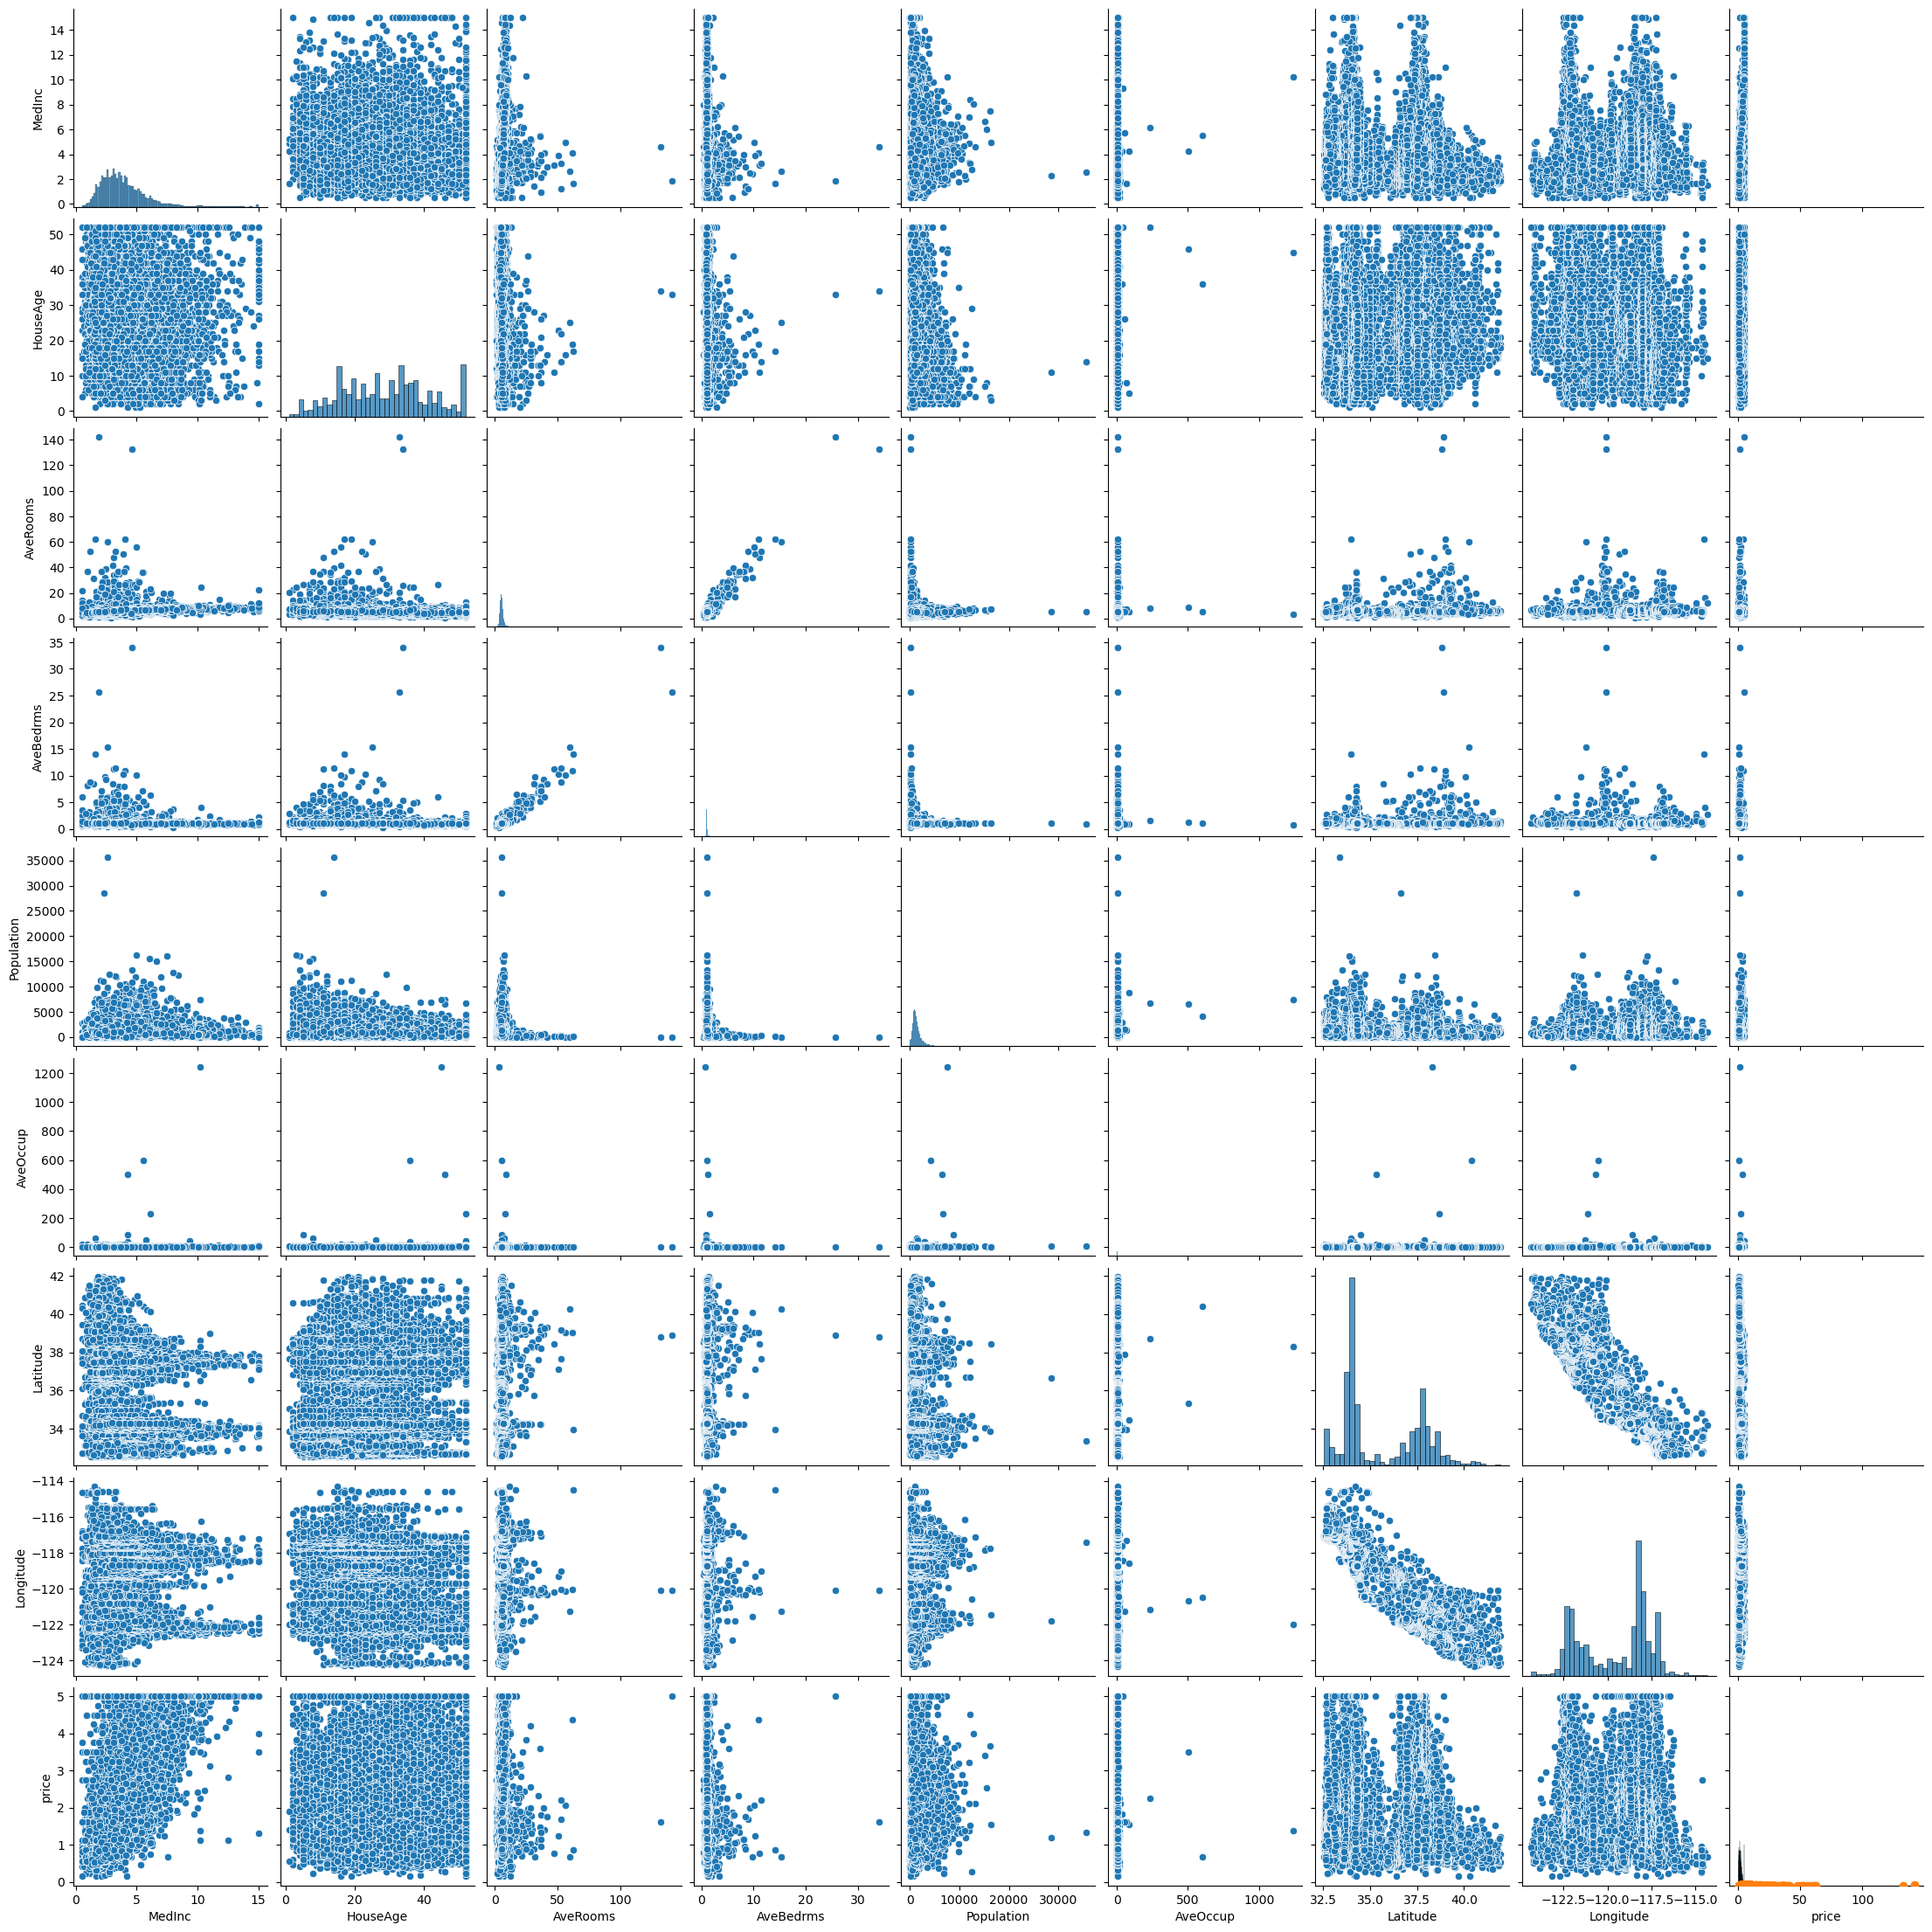

In [35]:
plt.scatter(dataset['AveRooms'],dataset['price'])

plt.xlabel("AveRooms")
plt.ylabel("price")
plt.show() 

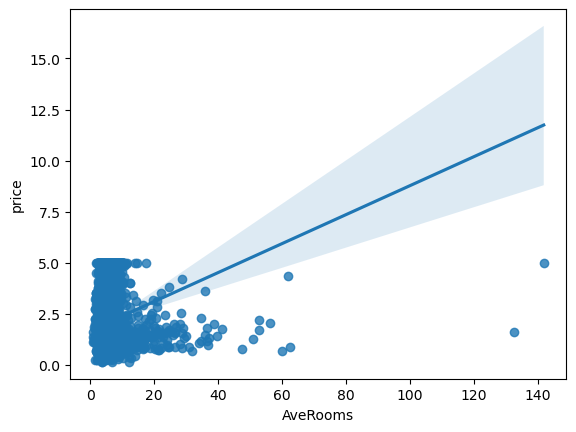

In [36]:
import seaborn as sns
sns.regplot(x="AveRooms",y="price",data=dataset)
plt.show()

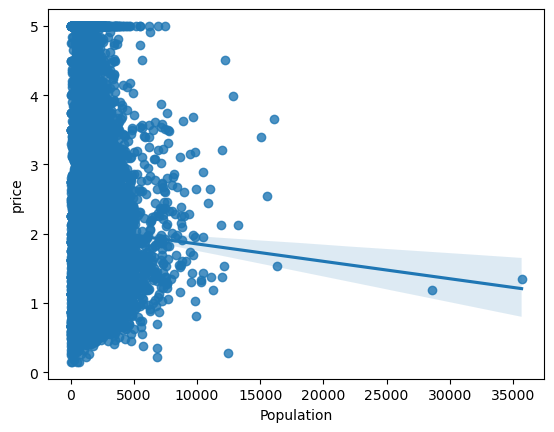

In [37]:
sns.regplot(x="Population",y="price",data=dataset)
plt.show()

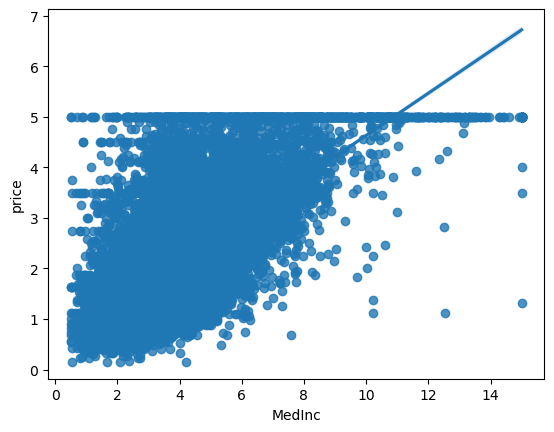

In [38]:
sns.regplot(x="MedInc",y="price",data=dataset)
plt.show()

In [117]:
## dependant and independant features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [119]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [41]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [121]:
## train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,)

In [123]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
19213,3.4550,48.0,5.883019,1.058491,1275.0,2.405660,38.45,-122.71
19477,2.4000,31.0,5.605442,0.996599,792.0,2.693878,37.67,-120.97
10717,3.7875,9.0,2.726496,1.136752,426.0,1.820513,33.65,-117.83
7513,4.0234,38.0,4.924528,1.000000,981.0,3.084906,33.90,-118.26
6959,4.1058,37.0,4.976589,1.063545,2117.0,3.540134,34.00,-118.07
...,...,...,...,...,...,...,...,...
7012,2.6991,30.0,4.336449,1.074766,913.0,4.266355,33.96,-118.07
17583,5.0477,16.0,4.230461,0.971944,1285.0,2.575150,37.30,-121.93
4208,3.1691,42.0,3.530093,1.055556,1688.0,3.907407,34.10,-118.24
4914,2.1480,46.0,4.273839,1.046455,1707.0,4.173594,34.00,-118.27


In [44]:
## standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [162]:
X_train=scaler.fit_transform(X_train)

In [164]:
X_test=scaler.transform(X_test)

In [166]:
X_train

array([[-0.22233331,  1.54427289,  0.19192342, ..., -0.0609232 ,
         1.32411439, -1.57217838],
       [-0.77994549,  0.19154985,  0.074842  , ..., -0.03366427,
         0.9585825 , -0.70206008],
       [-0.04659298, -1.55903291, -1.13949318, ..., -0.11626514,
        -0.92531258,  0.8681534 ],
       ...,
       [-0.37344357,  1.06684123, -0.80053726, ...,  0.08110865,
        -0.71442881,  0.66312552],
       [-0.91313817,  1.385129  , -0.48682633, ...,  0.10628399,
        -0.76129187,  0.64812349],
       [ 1.14363154, -1.00202931,  0.36727486, ...,  0.06012442,
        -0.81752754,  0.79814388]])

In [168]:
X_test

array([[-0.26673087, -0.92245736, -0.58136893, ...,  0.09915166,
        -0.87376322,  0.8181466 ],
       [ 0.44125161, -2.03646457, -0.69963384, ..., -0.14014641,
         1.01013187, -1.41215662],
       [ 1.8931046 ,  1.86256066,  0.84619393, ...,  0.00875113,
        -0.73317403,  0.61311873],
       ...,
       [-0.30864428,  0.43026568,  0.49326688, ...,  0.02610897,
         0.43371621,  0.01803782],
       [-1.18591887, -0.04716598, -1.22139426, ...,  0.12772297,
        -0.73786034,  0.67812756],
       [ 1.41017545, -1.16117319,  0.62153773, ...,  0.01736322,
        -0.80815493,  0.8931568 ]])

## Training model 

In [171]:
## Training model 
from sklearn.linear_model import LinearRegression

In [173]:
regression=LinearRegression()

In [175]:
regression.fit(x_train,y_train)

LinearRegression()

In [177]:
## print coefficient and intercept
print(regression.coef_)

[-1.71034922e-02 -1.19443838e-02  3.90603470e-02 -2.73002470e-02
 -9.85851624e-03  5.84212574e-05 -2.74744866e-03 -3.00130019e-03]


In [179]:
print(regression.intercept_)

2.0678421636212625


In [181]:
## on which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [183]:
## prediction with test data
reg_pred=regression.predict(x_test)

In [185]:
reg_pred

array([2.05607762, 2.10735579, 2.10539011, ..., 2.09364642, 2.05729492,
       2.04979623])

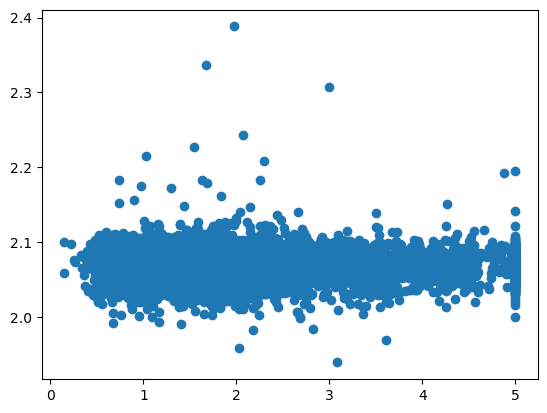

In [187]:
## plot a scatter plot for prediction
plt.scatter(y_test,reg_pred)
plt.show()

In [189]:
## Residuals
residuals=y_test-reg_pred

In [191]:
residuals

11342   -0.438078
15785    0.642644
4607     2.894620
14945   -0.411190
12119   -0.091790
           ...   
17230    2.351411
5826     1.210517
2448    -0.978646
4524    -0.541295
10306    0.632204
Name: price, Length: 6192, dtype: float64

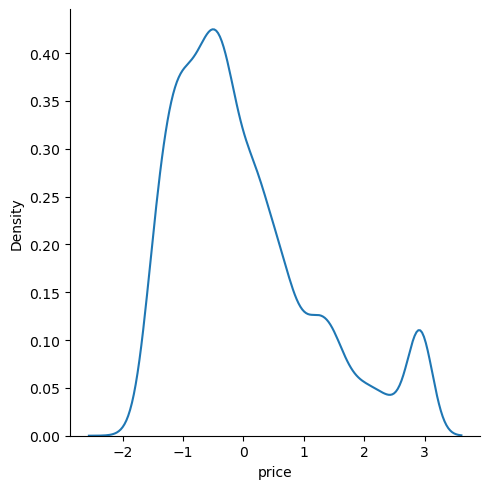

In [193]:
## Plot the Residuals
sns.displot(residuals,kind='kde')
plt.show()

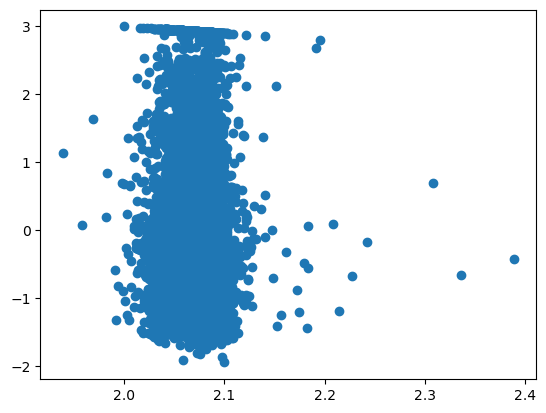

In [194]:
## scatter  plot with respect to prediction and residual
## uniform distribution
plt.scatter(reg_pred,residuals)
plt.show()

In [196]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [199]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))

1.3576251522432359
0.9211970210396864


## R square and Adjusted R square

##r^2

In [203]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.00019730545601737148


In [205]:
##Adjusted r^2

## New Data Predicttion

In [208]:
california.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [210]:
## transformation of new data
scaler.transform(california.data[0].reshape(1,-1))

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [212]:
regression.predict(scaler.transform(california.data[0].reshape(1,-1)))

array([-1.23093276])

## Pickling the model file for Deployment

In [215]:
import pickle

In [217]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [219]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [228]:
## Prediction
pickled_model.predict(scaler.transform(california.data[0].reshape(1,-1)))

array([-1.23093276])